In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('./complete_dataset.csv')
df

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N
2,2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
3,2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
4,2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101,2020-10-02,99585.835,-6.076028,41988.240,26.980251,57597.595,-30.173823,0.625000,12.8,26.0,22.0,0.0,N,N
2102,2020-10-03,92277.025,-1.983471,44133.510,32.438156,48143.515,-33.538025,0.583333,17.4,29.4,19.8,0.0,N,N
2103,2020-10-04,94081.565,25.008614,88580.995,26.571687,5500.570,-0.163066,0.062500,13.5,29.5,8.4,0.0,N,N
2104,2020-10-05,113610.030,36.764701,106587.375,39.616015,7022.655,-6.511550,0.083333,9.1,12.7,7.3,12.8,N,N


In [3]:
df.shape

(2106, 14)

In [4]:
df.describe()

,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall
count,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2105.000000,2103.000000
mean,120035.476503,76.079554,119252.305055,76.553847,783.171448,-2.686052,0.008547,11.582289,20.413200,14.743373,1.505944
std,13747.993761,130.246805,14818.631319,130.114184,3578.920686,19.485432,0.039963,4.313711,6.288693,7.945527,4.307897
min,85094.375000,-6.076028,41988.240000,13.568986,0.000000,-342.220000,0.000000,0.600000,9.000000,0.700000,0.000000
25%,109963.650000,38.707040,109246.250000,39.117361,0.000000,0.000000,0.000000,8.500000,15.525000,8.200000,0.000000
50%,119585.912500,66.596738,119148.082500,66.869058,0.000000,0.000000,0.000000,11.300000,19.100000,12.700000,0.000000
75%,130436.006250,95.075012,130119.477500,95.130181,0.000000,0.000000,0.000000,14.600000,23.900000,20.700000,0.800000
max,170653.840000,4549.645105,170653.840000,4549.645105,57597.595000,0.000000,0.625000,28.000000,43.500000,33.300000,54.600000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             2106 non-null   object 
 1   demand           2106 non-null   float64
 2   RRP              2106 non-null   float64
 3   demand_pos_RRP   2106 non-null   float64
 4   RRP_positive     2106 non-null   float64
 5   demand_neg_RRP   2106 non-null   float64
 6   RRP_negative     2106 non-null   float64
 7   frac_at_neg_RRP  2106 non-null   float64
 8   min_temperature  2106 non-null   float64
 9   max_temperature  2106 non-null   float64
 10  solar_exposure   2105 non-null   float64
 11  rainfall         2103 non-null   float64
 12  school_day       2106 non-null   object 
 13  holiday          2106 non-null   object 
dtypes: float64(11), object(3)
memory usage: 230.5+ KB


In [6]:
df.corr()

,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall
demand,1.000000,0.217538,0.971377,0.215038,-0.180638,0.057854,-0.189839,-0.156118,-0.073216,-0.257406,-0.064609
RRP,0.217538,1.000000,0.220856,0.999821,-0.078815,0.038931,-0.077955,0.070619,0.165484,0.061808,-0.028642
demand_pos_RRP,0.971377,0.220856,1.000000,0.214628,-0.409102,0.120054,-0.416573,-0.147020,-0.068146,-0.229749,-0.069696
RRP_positive,0.215038,0.999821,0.214628,1.000000,-0.062631,0.029455,-0.061968,0.071052,0.165663,0.061311,-0.027860
demand_neg_RRP,-0.180638,-0.078815,-0.409102,-0.062631,1.000000,-0.274847,0.995590,0.009030,0.000914,-0.037467,0.040387
RRP_negative,0.057854,0.038931,0.120054,0.029455,-0.274847,1.000000,-0.258065,-0.077248,-0.033255,0.001654,-0.020794
frac_at_neg_RRP,-0.189839,-0.077955,-0.416573,-0.061968,0.995590,-0.258065,1.000000,0.008859,-0.001174,-0.036701,0.038527
min_temperature,-0.156118,0.070619,-0.147020,0.071052,0.009030,-0.077248,0.008859,1.000000,0.705433,0.376261,-0.003050
max_temperature,-0.073216,0.165484,-0.068146,0.165663,0.000914,-0.033255,-0.001174,0.705433,1.000000,0.598995,-0.155392
solar_exposure,-0.257406,0.061808,-0.229749,0.061311,-0.037467,0.001654,-0.036701,0.376261,0.598995,1.000000,-0.123568


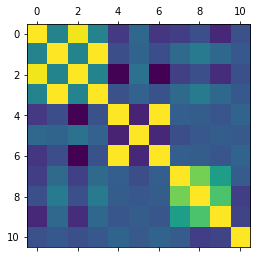

In [7]:
plt.matshow(df.corr())
plt.show()

<Figure size 1440x720 with 0 Axes>

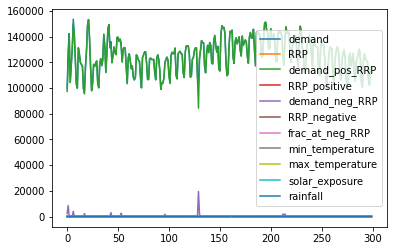

In [8]:
plt.figure(figsize=[20,10])
df[:300].plot()
plt.show()

In [9]:
df_min_max = minmax_scale(df.loc[:, 'demand':'rainfall'])

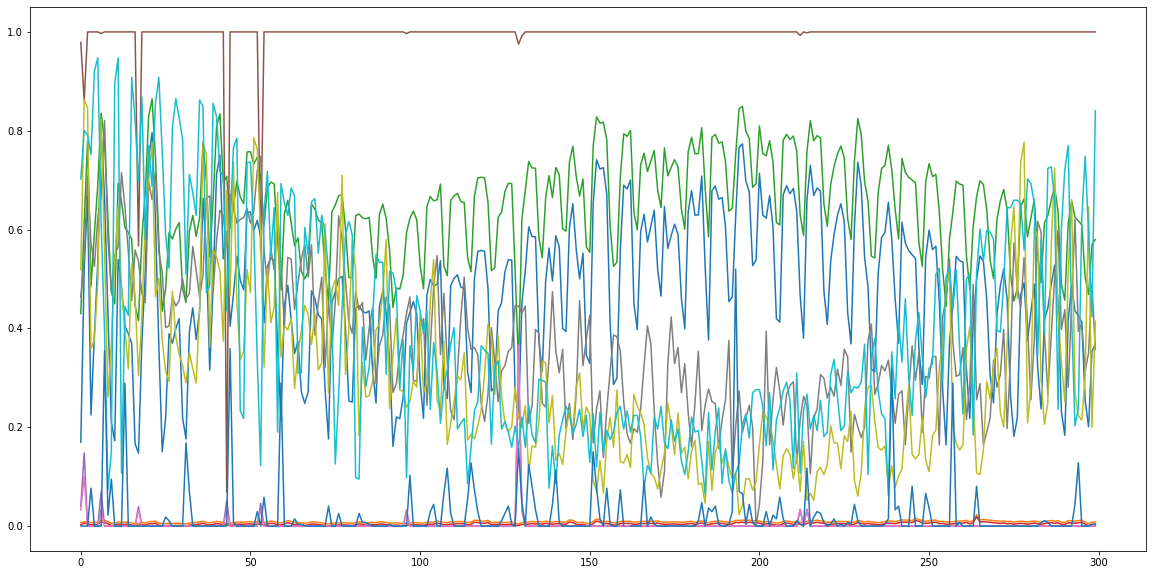

In [10]:
plt.figure(figsize=[20,10])
plt.plot(df_min_max[:300])
plt.show()

In [11]:
std = StandardScaler()
df_std = std.fit_transform(df.loc[:, 'demand':'rainfall'])

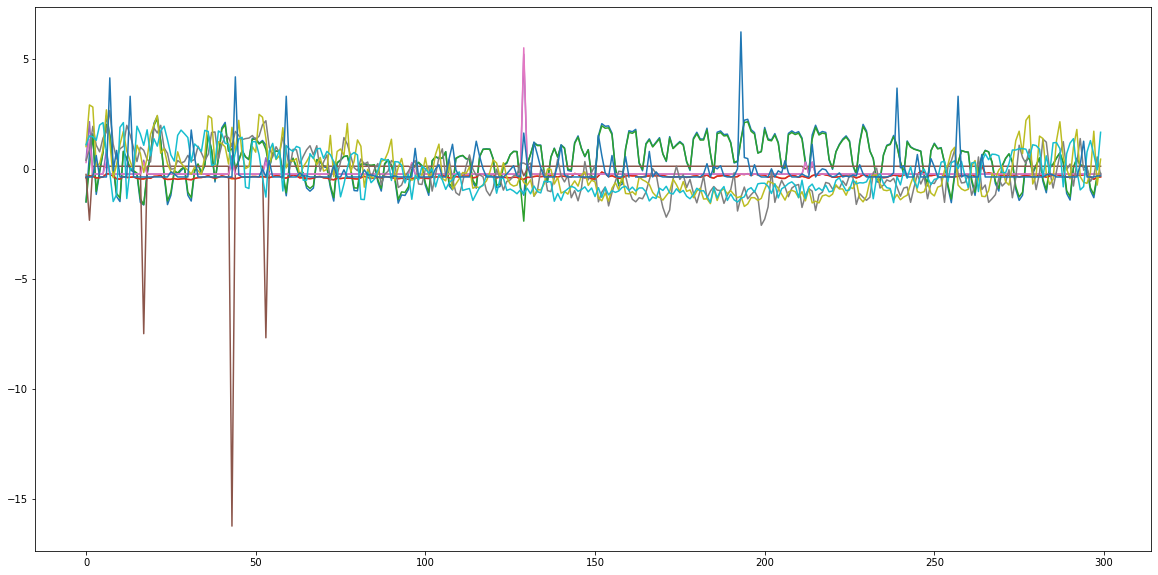

In [12]:
plt.figure(figsize=[20,10])
plt.plot(df_std[:300])
plt.show()